<a href="https://colab.research.google.com/github/Karthika506/Employee_burnout_analysis/blob/main/Employee_burnout_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [ ]:
data = pd.read_csv("./drive/MyDrive/employee_burnout_analysis.csv")

In [ ]:
data.shape

(22750, 9)

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30-09-2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-2008,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


# Exploratory Data Analysis

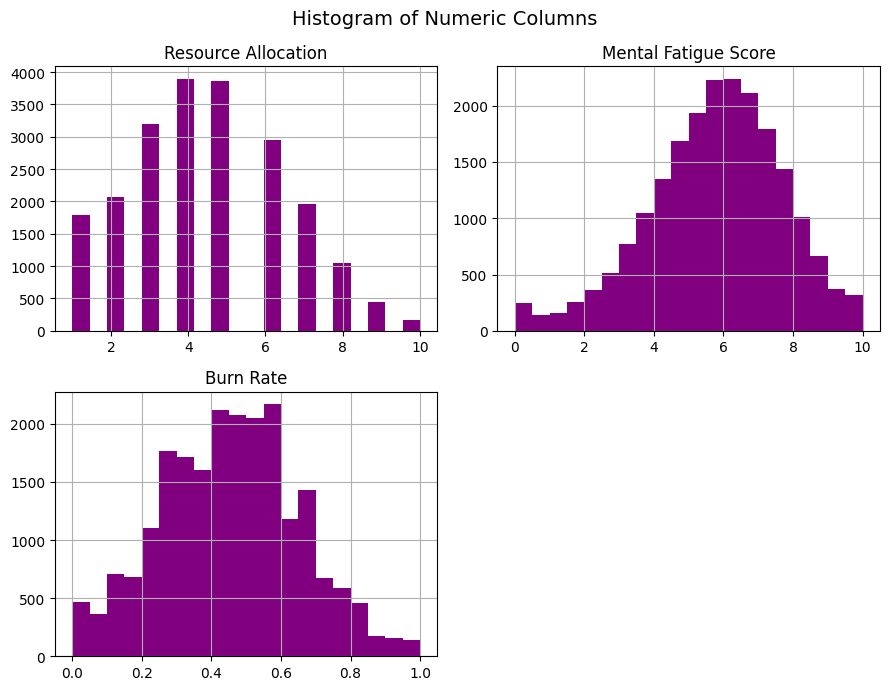

In [ ]:
num_col = ['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']

data[num_col].hist(bins=20, figsize=(9,7), color='purple')
plt.suptitle('Histogram of Numeric Columns', fontsize=14)
plt.tight_layout()
plt.show()

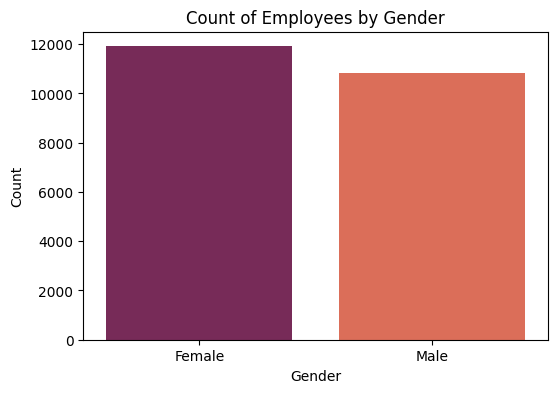

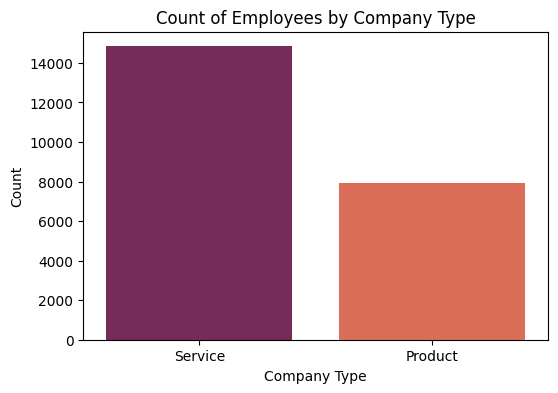

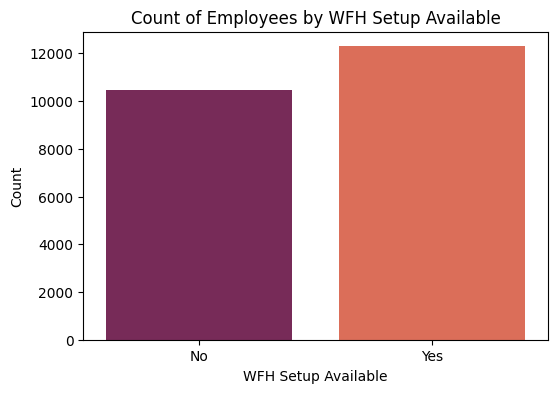

In [ ]:
cat_col = ['Gender', 'Company Type', 'WFH Setup Available']

for col in cat_col:
  plt.figure(figsize=(6,4))
  sns.countplot(x=col, data=data, palette='rocket')
  plt.title(f'Count of Employees by {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

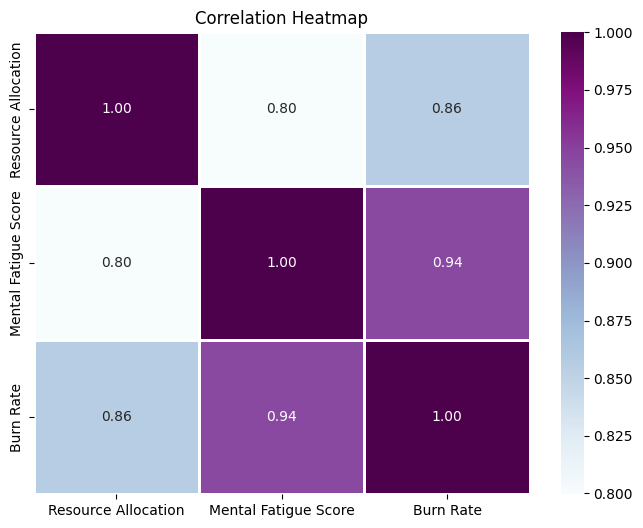

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data[num_col].corr(), annot=True, cmap='BuPu', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [ ]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
data = data.bfill(axis='rows')

In [ ]:
data.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
df = data.drop(['Employee ID', 'Date of Joining'], axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns_to_encode = ['Gender','Company Type', 'WFH Setup Available']
for column in columns_to_encode:
  df[column] = label_encoder.fit_transform(df[column])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
x = df.drop('Burn Rate', axis = 1)
y = df['Burn Rate']

In [ ]:
x.isnull().sum()

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, auc

mae=mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

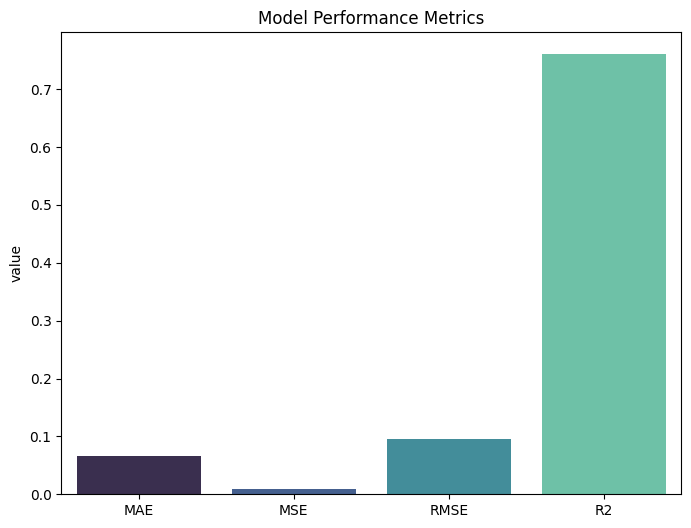

In [ ]:
plt.figure(figsize=(8,6))
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
values = [mae, mse, rmse, r2]
sns.barplot(x=metrics, y=values, palette='mako')
plt.title('Model Performance Metrics')
plt.ylabel('value')
plt.show()

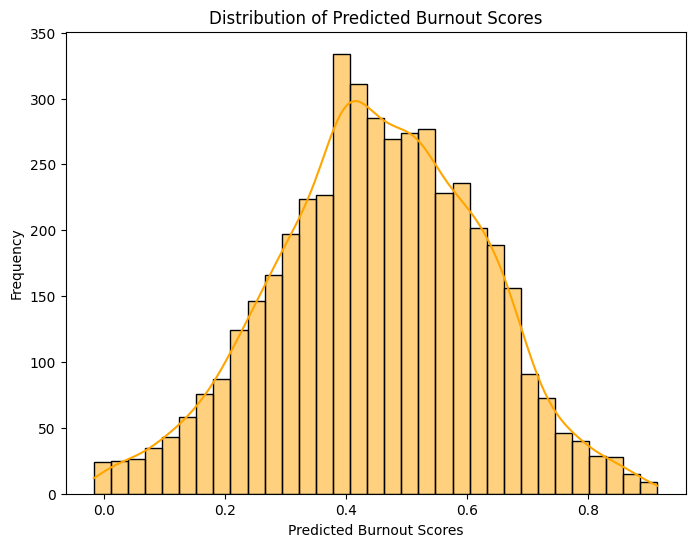

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, kde=True, color='orange', alpha = 0.5)
plt.title('Distribution of Predicted Burnout Scores')
plt.xlabel('Predicted Burnout Scores')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 0.06599155999403546
Mean Squared Error: 0.009190164919602034
Root Mean Squared Error: 0.09586534785626157
R2 Score: 0.7603597342791721
